In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

btc = yf.download('BTC-USD', start='2020-06-01', end='2025-06-01')

if isinstance(btc.columns, pd.MultiIndex):
    btc.columns = [col[0] for col in btc.columns]

btc = btc.rename(columns={
    'Open': 'Open',
    'High': 'Hight',
    'Low': 'Low',
    'Close': 'Close',
    'Adj Close': 'Adj Close',
    'Volume': 'Volume'
})

btc = btc.dropna()

btc.index = pd.to_datetime(btc.index)

C:\Users\guiga\AppData\Local\Temp\ipykernel_15816\4269521077.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2020-06-01', end='2025-06-01')
[*********************100%***********************]  1 of 1 completed


In [7]:
print(btc.dtypes)
btc.head()

Close     float64
Hight     float64
Low       float64
Open      float64
Volume      int64
dtype: object


,Close,Hight,Low,Open,Volume
Date,,,,,
2020-06-01,10167.268555,10199.565430,9450.899414,9463.605469,35198901068
2020-06-02,9529.803711,10182.340820,9460.571289,10162.973633,39137252109
2020-06-03,9656.717773,9682.859375,9471.846680,9533.760742,25007459262
2020-06-04,9800.636719,9887.610352,9525.247070,9655.854492,25921805072
2020-06-05,9665.533203,9869.237305,9663.216797,9800.215820,23509628646


In [8]:
btc.to_csv('BTC_dadosLimpos.csv')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8,4))
btc.plot(x='Date', y='Close', kind='line', marker='o', figsize=(8,4), title='Lineplot Simples')
plt.xlabel('Dias')
plt.ylabel('Preço Close')
plt.grid(True)
plt.show()

KeyError: 'Date'

<Figure size 800x400 with 0 Axes>

In [11]:
print(btc.columns)


Index(['Close', 'Hight', 'Low', 'Open', 'Volume'], dtype='object')


In [14]:
btc = btc.reset_index()  # Converte o índice "Date" em coluna
print(btc.head())

        Date         Close         Hight          Low          Open  \
0 2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469   
1 2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633   
2 2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742   
3 2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492   
4 2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820   

        Volume  
0  35198901068  
1  39137252109  
2  25007459262  
3  25921805072  
4  23509628646  


In [15]:
print(btc.columns)


Index(['Date', 'Close', 'Hight', 'Low', 'Open', 'Volume'], dtype='object')


<Figure size 800x400 with 0 Axes>

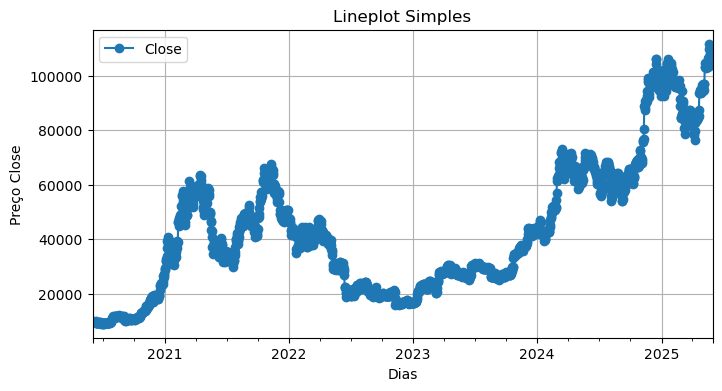

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8,4))
btc.plot(x='Date', y='Close', kind='line', marker='o', figsize=(8,4), title='Lineplot Simples')
plt.xlabel('Ano')
plt.ylabel('Preço Close')
plt.grid(True)
plt.show()

In [18]:
import matplotlib.pyplot as plt

data_final = pd.to_datetime('2025-06-01')  # Exemplo
ultimos_2_meses = btc.loc[data_final - pd.DateOffset(months=2):]

plt.figure(figsize=(8,4))
ultimos_2_meses.plot(x='Date', y='Close', kind='line', marker='o', figsize=(8,4), title='Lineplot Simples')
plt.xlabel('Dias')
plt.ylabel('Preço Close')
plt.grid(True)
plt.show()

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [19]:
print(btc.index.dtype)

int64


In [20]:
print(btc.head())  # Verifique se 'Date' aparece como coluna
print(btc['Date'].dtype)  # Deve ser datetime64[ns]

        Date         Close         Hight          Low          Open  \
0 2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469   
1 2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633   
2 2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742   
3 2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492   
4 2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820   

        Volume  
0  35198901068  
1  39137252109  
2  25007459262  
3  25921805072  
4  23509628646  
datetime64[ns]


<Figure size 800x400 with 0 Axes>

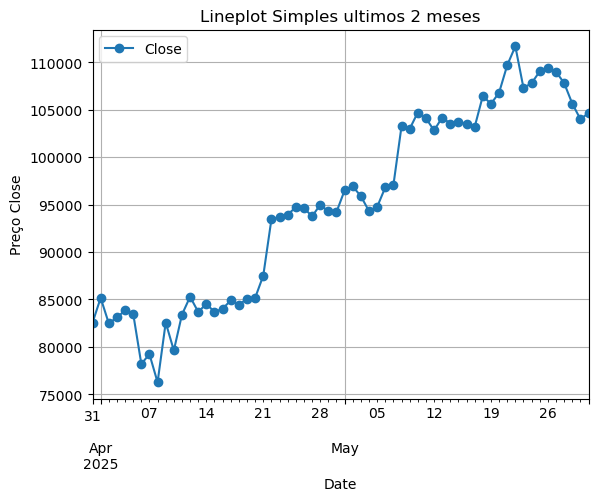

In [23]:
data_final = btc['Date'].max()
ultimos_2_meses = btc[btc['Date'] >= (data_final - pd.DateOffset(months=2))]

plt.figure(figsize=(8,4))
ultimos_2_meses.plot(x='Date', y='Close', kind='line', marker='o', title='Lineplot Simples ultimos 2 meses')
plt.ylabel('Preço Close')
plt.grid(True)
plt.show()

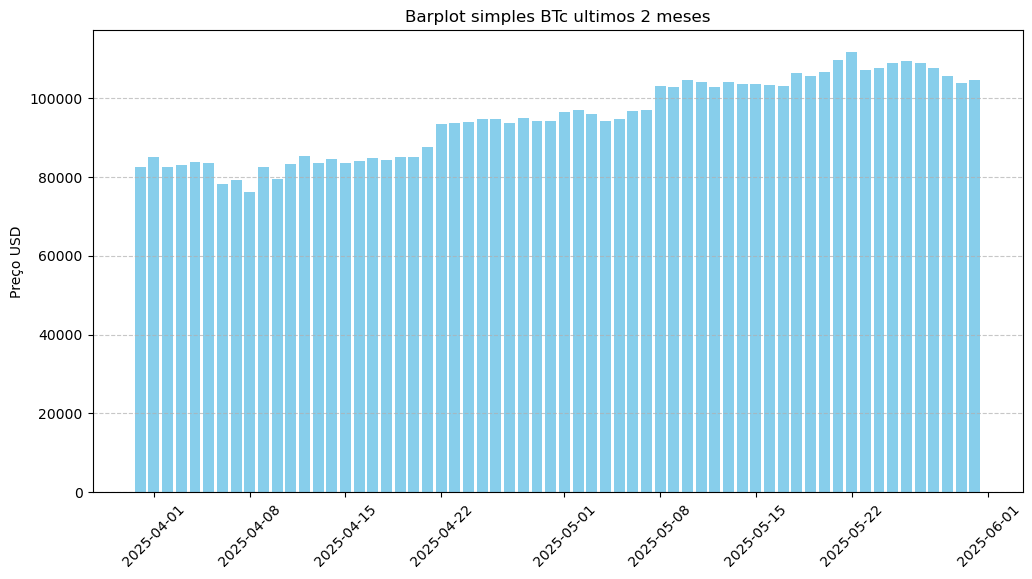

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(ultimos_2_meses['Date'], ultimos_2_meses['Close'], color='skyblue', width=0.8)
plt.title('Barplot simples BTc ultimos 2 meses')
plt.ylabel('Preço USD')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
import pandas as pd

btc = pd.read_csv('btc_limpo.csv')

In [12]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [13]:
print(btc.head())
print(btc.tail())
print(btc.info())


        Date         Close         Hight          Low          Open  \
0 2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469   
1 2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633   
2 2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742   
3 2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492   
4 2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820   

        Volume  
0  35198901068  
1  39137252109  
2  25007459262  
3  25921805072  
4  23509628646  
           Date          Close          Hight            Low           Open  \
1821 2025-05-27  108994.640625  110744.210938  107609.554688  109440.406250   
1822 2025-05-28  107802.328125  109298.289062  106812.929688  108992.171875   
1823 2025-05-29  105641.757812  108910.046875  105374.398438  107795.570312   
1824 2025-05-30  103998.570312  106308.945312  103685.789062  105646.210938   
1825 2025-05-31  104638.093750  104927.101562  103136.117188  103994.718750 

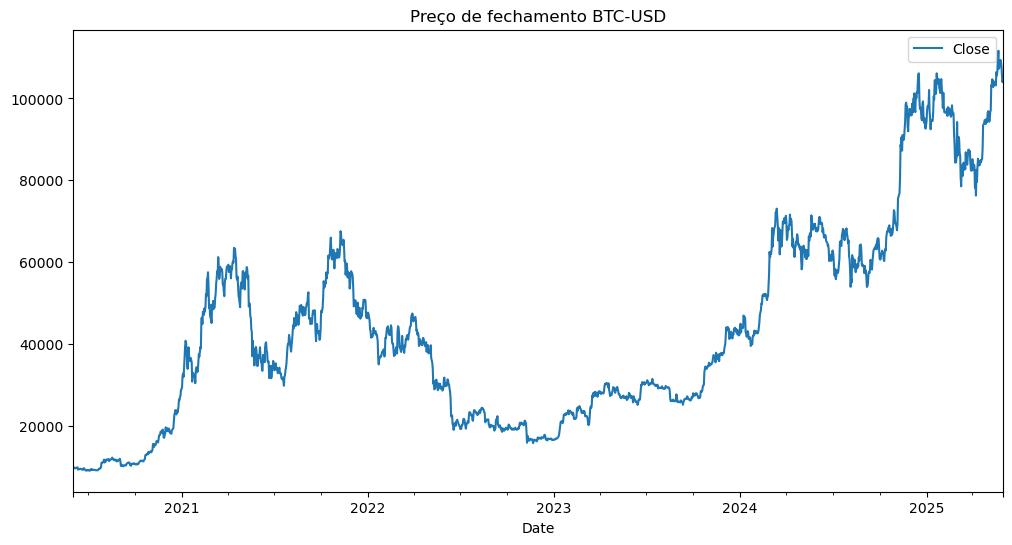

In [19]:
import matplotlib.pyplot as plt
btc.plot(figsize=(12,6), y='Close', x='Date', title='Preço de fechamento BTC-USD')
plt.show()

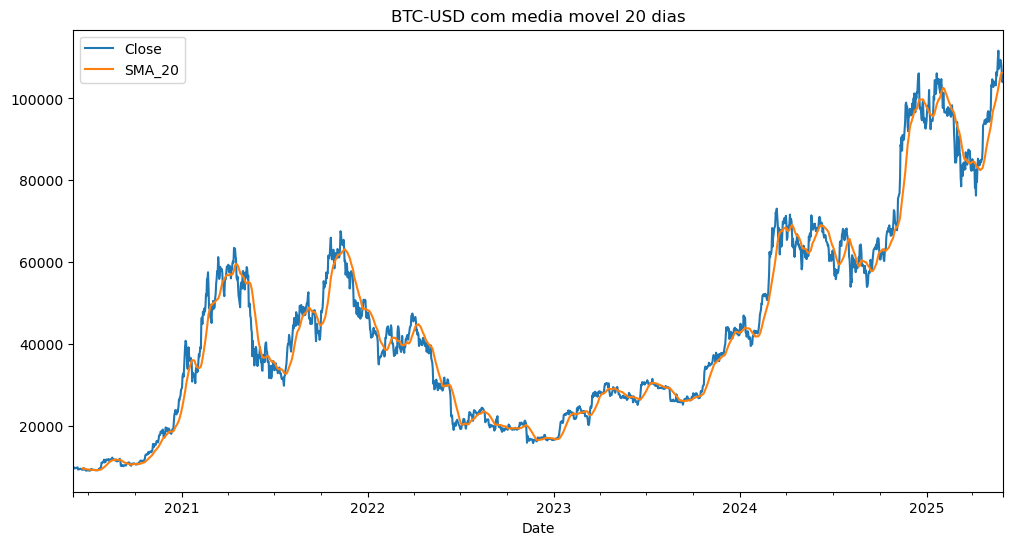

In [29]:
btc['SMA_20'] = btc['Close'].rolling(20).mean()
btc[['Close','SMA_20']].plot(figsize=(12,6), title='BTC-USD com media movel 20 dias')
plt.show()

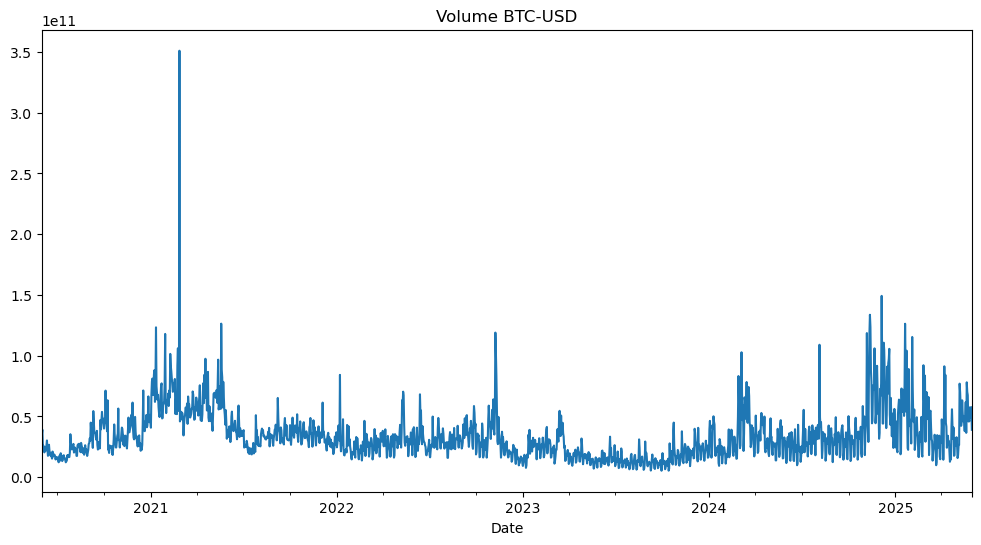

In [31]:
btc['Volume'].plot(figsize=(12,6), title='Volume BTC-USD')
plt.show()

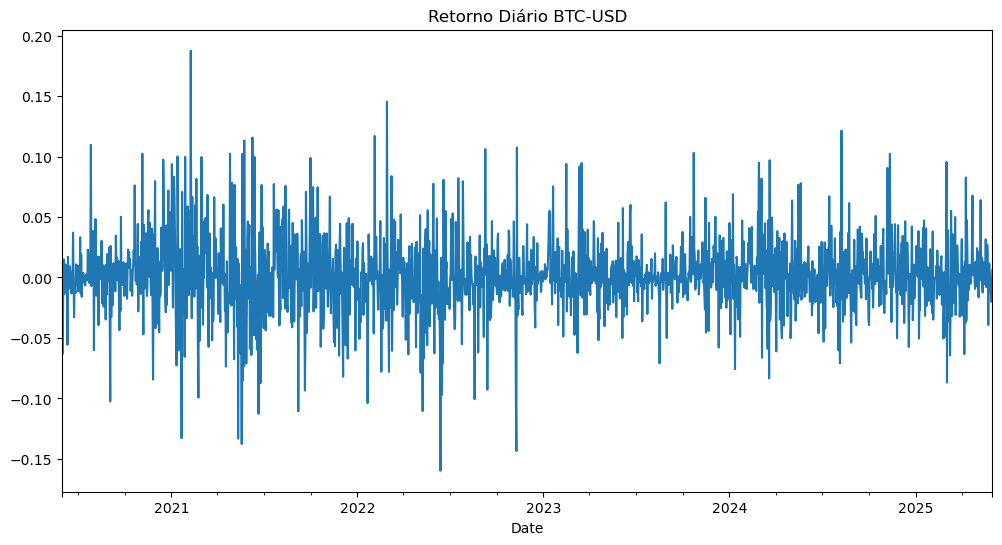

In [32]:
btc['Daily Return'] = btc['Close'].pct_change()
btc['Daily Return'].plot(figsize=(12,6), title='Retorno Diário BTC-USD')
plt.show()

In [38]:
btc_original_1y = btc_original[btc_original['Date'] >= '2024-06-01']

print(btc_original_1y.head())
print(btc_original_1y.info())

            Date         Close         Hight           Low          Open  \
1461  2024-06-01  67706.937500  67839.765625  67386.195312  67489.609375   
1462  2024-06-02  67751.601562  68409.164062  67315.523438  67710.273438   
1463  2024-06-03  68804.781250  70230.820312  67589.835938  67753.898438   
1464  2024-06-04  70567.765625  71047.406250  68564.640625  68804.570312   
1465  2024-06-05  71082.820312  71735.414062  70390.710938  70568.351562   

           Volume  
1461  11641495604  
1462  17110588415  
1463  32401285324  
1464  33149696545  
1465  32810771409  
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1461 to 1825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   Close   365 non-null    float64
 2   Hight   365 non-null    float64
 3   Low     365 non-null    float64
 4   Open    365 non-null    float64
 5   Volume  365 non-null    int64  
dtypes: float64(4), int6

In [39]:
btc_original_1y.to_csv('btc_date_limpo_1y.csv')

In [41]:
print(btc.head())

                   Close         Hight          Low          Open  \
Date                                                                
2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469   
2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633   
2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742   
2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492   
2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820   

                 Volume  SMA_20  Daily Return  
Date                                           
2020-06-01  35198901068     NaN           NaN  
2020-06-02  39137252109     NaN     -0.062698  
2020-06-03  25007459262     NaN      0.013318  
2020-06-04  25921805072     NaN      0.014904  
2020-06-05  23509628646     NaN     -0.013785  


In [47]:
import pandas as  pd

btc_zerado = pd.read_csv('btc_date_limpo.csv')

In [48]:
print(btc_zerado.head())

         Date         Close         Hight          Low          Open  \
0  2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469   
1  2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633   
2  2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742   
3  2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492   
4  2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820   

        Volume  
0  35198901068  
1  39137252109  
2  25007459262  
3  25921805072  
4  23509628646  


In [49]:
btc_zerado['Date'] = pd.to_datetime(btc_zerado['Date'])  # garante que seja datetime
btc_zerado = btc_zerado.set_index('Date')  # usa a data como índice


In [50]:
print(btc_zerado.head())

                   Close         Hight          Low          Open       Volume
Date                                                                          
2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469  35198901068
2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633  39137252109
2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742  25007459262
2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492  25921805072
2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820  23509628646


In [51]:
btc_zerado.to_csv('btc_limpo.csv')


In [52]:
btc_zerado_1y = btc_zerado.loc['2024-06-01':'2025-06-01']

In [53]:
print(btc_zerado_1y.head())

                   Close         Hight           Low          Open  \
Date                                                                 
2024-06-01  67706.937500  67839.765625  67386.195312  67489.609375   
2024-06-02  67751.601562  68409.164062  67315.523438  67710.273438   
2024-06-03  68804.781250  70230.820312  67589.835938  67753.898438   
2024-06-04  70567.765625  71047.406250  68564.640625  68804.570312   
2024-06-05  71082.820312  71735.414062  70390.710938  70568.351562   

                 Volume  
Date                     
2024-06-01  11641495604  
2024-06-02  17110588415  
2024-06-03  32401285324  
2024-06-04  33149696545  
2024-06-05  32810771409  


In [54]:
btc_zerado_1y.to_csv('btc_limpo_1y.csv')

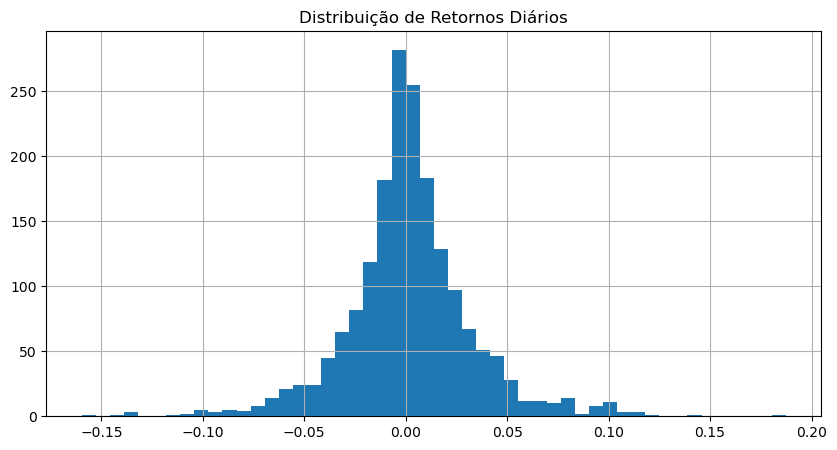

In [58]:
btc['Daily Return'].hist(bins=50, figsize=(10,5))
plt.title('Distribuição de Retornos Diários')
plt.show()

In [60]:
btc.to_csv('btc_limpo_sma20_dailyreturn.csv')